In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import re
from ExperimentUtils import list_filepaths, filter_regex, filter_best_key
from DataframesUtils import DataframesMetricsManager, _TransactionsHandler
from ResultsAnalysisUtils import plot_experiments_metric_curves_by_profile_size
import LatexUtils

cls._global_metricsdb_engine initialized
cls._global_metricsdb_conn initialized


In [3]:
%aimport ExperimentUtils
%aimport DataframesUtils
%aimport LatexUtils
%aimport ResultsAnalysisUtils

In [4]:
file2name = dict()

In [5]:
all_keys = list_filepaths('/mnt/workspace/ugallery_experiment_results/')

In [6]:
len(all_keys)

15

In [7]:
for key in all_keys:
    file2name[key] =\
        key[:-4]\
            .replace('cosine','cos')\
            .replace(os.path.sep,'_')

In [8]:
DataframesMetricsManager.set_value_func('customer_gb', DataframesMetricsManager.get_customer_groupby)
DataframesMetricsManager.set_void_func('set_rec_ids_list_column', DataframesMetricsManager.set_rec_ids_list_column)
DataframesMetricsManager.set_void_func('set_gt_idxs_list_column', DataframesMetricsManager.set_gt_idxs_list_column)
DataframesMetricsManager.set_void_func('set_last_purchase_column', DataframesMetricsManager.set_last_purchase_column)
DataframesMetricsManager.set_void_func('set_auc_column', DataframesMetricsManager.set_auc_column)#, override=True)
for k in (10, 20, 40, 50, 60, 100):
    DataframesMetricsManager.set_void_func('set_prec_at%d_column' % k, DataframesMetricsManager.set_prec_column, k)#, override=True)
    DataframesMetricsManager.set_void_func('set_rec_at%d_column' % k, DataframesMetricsManager.set_rec_column, k)#, override=True)
    DataframesMetricsManager.set_void_func('set_f1_at%d_column' % k, DataframesMetricsManager.set_f1_column, k)#, override=True)
    DataframesMetricsManager.set_void_func('set_ndcg_at%d_column' % k, DataframesMetricsManager.set_ndcg_column, k)#, override=True)
    DataframesMetricsManager.set_void_func('set_ap_at%d_column' % k, DataframesMetricsManager.set_ap_column, k)#, override=True)
    DataframesMetricsManager.set_void_func('set_rr_at%d_column' % k, DataframesMetricsManager.set_rr_column, k)#, override=True)

DataframesMetricsManager.set_metric_func('auc', DataframesMetricsManager.get_auc)#, override=True)
DataframesMetricsManager.set_metric_func('auc_last', DataframesMetricsManager.get_auc__last_purchase)#, override=True)
for k in (10, 20, 40, 50, 60, 100):
    DataframesMetricsManager.set_metric_func('prec_at%d' % k, DataframesMetricsManager.get_precision, k)#, override=True)
    DataframesMetricsManager.set_metric_func('rec_at%d' % k, DataframesMetricsManager.get_recall, k)#, override=True)
    DataframesMetricsManager.set_metric_func('f1sc_at%d' % k, DataframesMetricsManager.get_f1score, k)#, override=True)
    DataframesMetricsManager.set_metric_func('ndcg_at%d' % k, DataframesMetricsManager.get_ndcg, k)#, override=True)
    DataframesMetricsManager.set_metric_func('map_at%d' % k, DataframesMetricsManager.get_map, k)#, override=True)
    DataframesMetricsManager.set_metric_func('mrr_at%d' % k, DataframesMetricsManager.get_mrr, k)#, override=True)    
    DataframesMetricsManager.set_metric_func('prec_at%d_last' % k, DataframesMetricsManager.get_precision__last_purchase, k)#, override=True)
    DataframesMetricsManager.set_metric_func('rec_at%d_last' % k, DataframesMetricsManager.get_recall__last_purchase, k)#, override=True)
    DataframesMetricsManager.set_metric_func('f1sc_at%d_last' % k, DataframesMetricsManager.get_f1score__last_purchase, k)#, override=True)
    DataframesMetricsManager.set_metric_func('ndcg_at%d_last' % k, DataframesMetricsManager.get_ndcg__last_purchase, k)#, override=True)
    DataframesMetricsManager.set_metric_func('map_at%d_last' % k, DataframesMetricsManager.get_map__last_purchase, k)#, override=True)
    DataframesMetricsManager.set_metric_func('mrr_at%d_last' % k, DataframesMetricsManager.get_mrr__last_purchase, k)#, override=True)    

DataframesMetricsManager.set_metric_func('uc', DataframesMetricsManager.get_user_coverage)#, override=True)
DataframesMetricsManager.set_metric_func('sc', DataframesMetricsManager.get_session_coverage)#, override=True)

In [9]:
def print_summary_table_regex(regexp, metric_names, comp_metric_name, **kwargs):
    filtered_keys = filter_regex(all_keys, regexp)
    LatexUtils.print_summary_table(filtered_keys, metric_names, comp_metric_name, DataframesMetricsManager,
                                   file2name, **kwargs)

In [10]:
print_summary_table_regex('.*', ['auc_last', 'ndcg_at100_last'], 'auc_last', floatfmt='.6f')

** outdated modiftime in db detected, prev=1575678866.9870195389, curr=1575748496.7592234612, expkey = ./@20_(maxprofsize=oo)_curatornet-v34(10M-500K,avg+max,rsnt50+rsnxt101,u(300,300,200)i(200,200),hyb(fa+dnn),rl(full),ab.2,cm.18,fg.7,wd.0001).csv
name                                                                                                                                                                 auc_last    ndcg_at100_last
-----------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------  -----------------
._@20_(maxprofsize=oo)_curatornet-v33(10M-500K,avg+max,rsnt50+rsnxt101,u(300,300,200)i(200,200),hyb(fa+dnn),rl.8+fk.2,ab.2,cm.18,fg.7,wd.0001)                       0.740159           0.138254
._@20_(maxprofsize=oo)_curatornet-v32(10M-500K,avg+max,rsnt50+rsnxt101,u(300,300,200)i(200,200),hyb(fa+dnn),rl.2+fk.8,ab.2,cm.18,fg.7,wd.0001)                       0.73998

In [11]:
score_getter = lambda key : DataframesMetricsManager.get_metric(key, 'auc_last')

In [13]:
best_curatornet_v34_key =\
    filter_best_key(all_keys, '(?=.*curatornet.*v34.*)', score_getter)
best_curatornet_v33_key =\
    filter_best_key(all_keys, '(?=.*curatornet.*v33.*)', score_getter)
best_curatornet_v32_key =\
    filter_best_key(all_keys, '(?=.*curatornet.*v32.*)', score_getter)
best_curatornet_v31_key =\
    filter_best_key(all_keys, '(?=.*curatornet.*v31.*)', score_getter)

best_curatornet_v21_key =\
    filter_best_key(all_keys, '(?=.*curatornet.*v21.*)', score_getter)
best_curatornet_v20_key =\
    filter_best_key(all_keys, '(?=.*curatornet.*v20.*)', score_getter)
best_curatornet_v19_key =\
    filter_best_key(all_keys, '(?=.*curatornet.*v19.*)', score_getter)
best_curatornet_v18_key =\
    filter_best_key(all_keys, '(?=.*curatornet.*v18.*)', score_getter)

best_curatornet_resnet_10M_key =\
    filter_best_key(all_keys, '(?=.*curatornet.*resnet.*10m.*)', score_getter)

best_vbpr_v14_key =\
    filter_best_key(all_keys, '(?=.*vbpr.*v14.*)', score_getter)
best_vbpr_v13_key =\
    filter_best_key(all_keys, '(?=.*vbpr.*v13.*)', score_getter)

best_vbpr_v11_key =\
    filter_best_key(all_keys, '(?=.*vbpr.*v11.*)', score_getter)
best_vbpr_v10_key =\
    filter_best_key(all_keys, '(?=.*vbpr.*v10.*)', score_getter)
best_vbpr_v9_key =\
    filter_best_key(all_keys, '(?=.*vbpr.*v9.*)', score_getter)
best_vbpr_v8_key =\
    filter_best_key(all_keys, '(?=.*vbpr.*v8.*)', score_getter)

'./@20_(maxprofsize=oo)_curatornet-curatornet_resnet_10m.csv'

In [17]:
# best_exp_keys = [
#     best_curatornet_v34_key,
#     best_curatornet_v33_key,
#     best_curatornet_v32_key,
#     best_curatornet_v31_key,
#     best_curatornet_v19_key,
#     best_vbpr_v14_key,
#     best_vbpr_v13_key,
# ]
# best_exp_names = [
#     'Curatornet (v34)',
#     'Curatornet (v33)',
#     'Curatornet (v32)',
#     'Curatornet (v31)',
#     'Curatornet (v19)',
#     'VBPR (v14)',
#     'VBPR (v13)',
# ]
best_exp_keys = [
    best_curatornet_v18_key,
    best_curatornet_v19_key,
    best_curatornet_v20_key,
    best_curatornet_v21_key,
    best_curatornet_resnet_10M_key,
    best_vbpr_v8_key,
    best_vbpr_v9_key,
    best_vbpr_v10_key,
    best_vbpr_v11_key,
]
best_exp_names = [
    'CuratorNet v18 (lr=0)',
    'CuratorNet v19 (lr=0.0001)',
    'CuratorNet v20 (lr=0.001)',
    'CuratorNet v21 (lr=0.01)',
    'CuratorNet ResNet 10M',
    'VBPR v8 (lr=0)',
    'VBPR v9 (lr=0.0001)',
    'VBPR v10 (lr=0.001)',
    'VBPR v11 (lr=0.01)',
]

assert len(best_exp_names) == len(best_exp_keys)
for name, key in zip(best_exp_names, best_exp_keys):
    print("{}:\t  {}".format(name, key))

CuratorNet v18 (lr=0):	  ./@20_(maxprofsize=oo)_curatornet-v18(10M-400K,avg+max,rsnt50,u(300,300,200)i(200,200),+p(rl&fk)-np,+npfavc(rl&fk)-nfavc,+nxt+hdaccklst-nfavc,fg.6,vcf.1).csv
CuratorNet v19 (lr=0.0001):	  ./@20_(maxprofsize=oo)_curatornet-v19(10M-400K,avg+max,rsnt50,u(300,300,200)i(200,200),+p(rl&fk)-np,+npfavc(rl&fk)-nfavc,+nxt+hdaccklst-nfavc,fg.6,vcf.1,wd.0001).csv
CuratorNet v20 (lr=0.001):	  ./@20_(maxprofsize=oo)_curatornet-v20(10M-400K,avg+max,rsnt50,u(300,300,200)i(200,200),+p(rl&fk)-np,+npfavc(rl&fk)-nfavc,+nxt+hdaccklst-nfavc,fg.6,vcf.1,wd.001).csv
CuratorNet v21 (lr=0.01):	  ./@20_(maxprofsize=oo)_curatornet-v21(10M-400K,avg+max,rsnt50,u(300,300,200)i(200,200),+p(rl&fk)-np,+npfavc(rl&fk)-nfavc,+nxt+hdaccklst-nfavc,fg.6,vcf.1,wd.01).csv
CuratorNet ResNet 10M:	  ./@20_(maxprofsize=oo)_curatornet-curatornet_resnet_10m.csv
VBPR v8 (lr=0):	  ./@20_vbpr-v8(10M-400K,rsnt50,u(200)i(100l+100v),+p-np,+npfavc-nfavc,fg.6,vcf.1)
VBPR v9 (lr=0.0001):	  ./@20_vbpr-v9(10M-400K,rsnt5

In [18]:
metric_names = ['auc_last', 'rec_at20_last', 'prec_at20_last', 'ndcg_at20_last',
                'rec_at100_last', 'prec_at100_last', 'ndcg_at100_last']
metric_aliases = ['AUC', 'R@20', 'P@20', 'nDCG@20', 'R@100', 'P@100', 'nDCG@100']

LatexUtils.print_best_experiments_summary_table(
    best_exp_keys, best_exp_names, DataframesMetricsManager,
    sortby='auc_last',
    metric_names= metric_names,
    metric_aliases=metric_aliases,
    tablefmt='normal', floatfmt='.4f')

name                           AUC    R@20    P@20    nDCG@20    R@100    P@100    nDCG@100
--------------------------  ------  ------  ------  ---------  -------  -------  ----------
CuratorNet ResNet 10M        .7216   .1740   .0104      .0950    .3142    .0039       .1231
CuratorNet v19 (lr=0.0001)   .7204   .1683   .0106      .0966    .3200    .0040       .1246
CuratorNet v20 (lr=0.001)    .7177   .1566   .0094      .0895    .2937    .0037       .1160
CuratorNet v18 (lr=0)        .7131   .1689   .0100      .0977    .3048    .0038       .1239
CuratorNet v21 (lr=0.01)     .7125   .1235   .0075      .0635    .2548    .0032       .0904
VBPR v9 (lr=0.0001)          .6641   .1368   .0081      .0728    .2399    .0030       .0923
VBPR v8 (lr=0)               .6543   .1287   .0078      .0670    .2077    .0026       .0829
VBPR v10 (lr=0.001)          .6410   .0830   .0047      .0387    .1948    .0024       .0620
VBPR v11 (lr=0.01)           .5489   .0101   .0005      .0039    .0506    .0006 

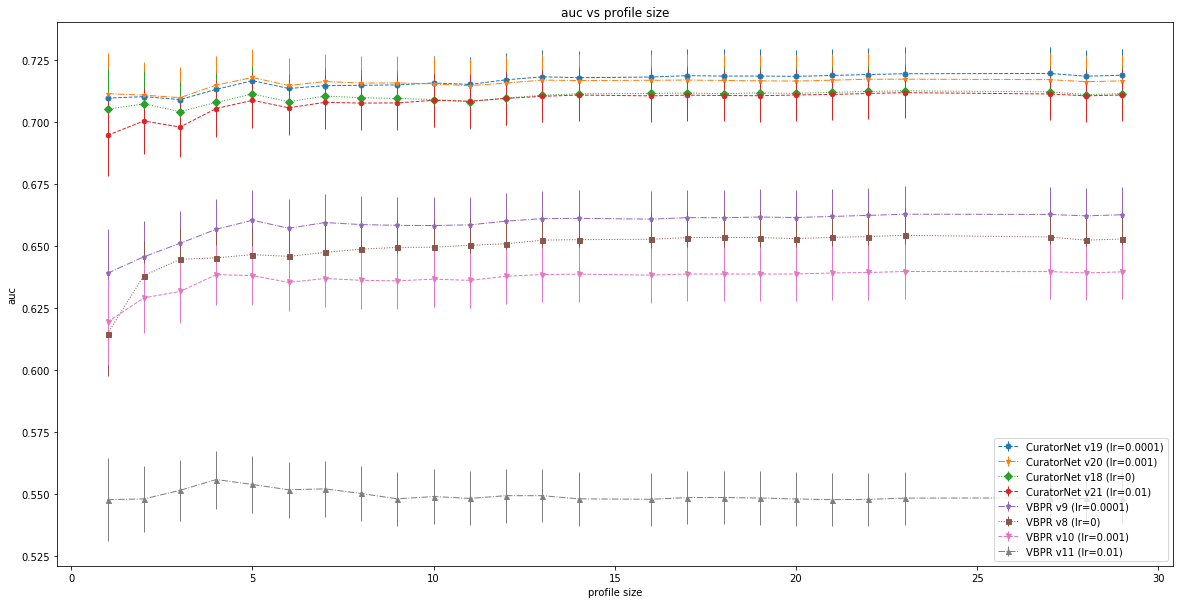

In [58]:
plot_experiments_metric_curves_by_profile_size(
    best_exp_keys, best_exp_names,
    DataframesMetricsManager,
    metric='auc',
    last_purchase_only=True,
    max_profsize=30,
    figsize=(20, 10), accumulative=True, sort_by_last=True)